<a href="https://colab.research.google.com/github/arseller/VirtualMaitre/blob/master/Clients_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clients Clustering



---






<p>&nbsp;</p> 

##### **Data Flow**

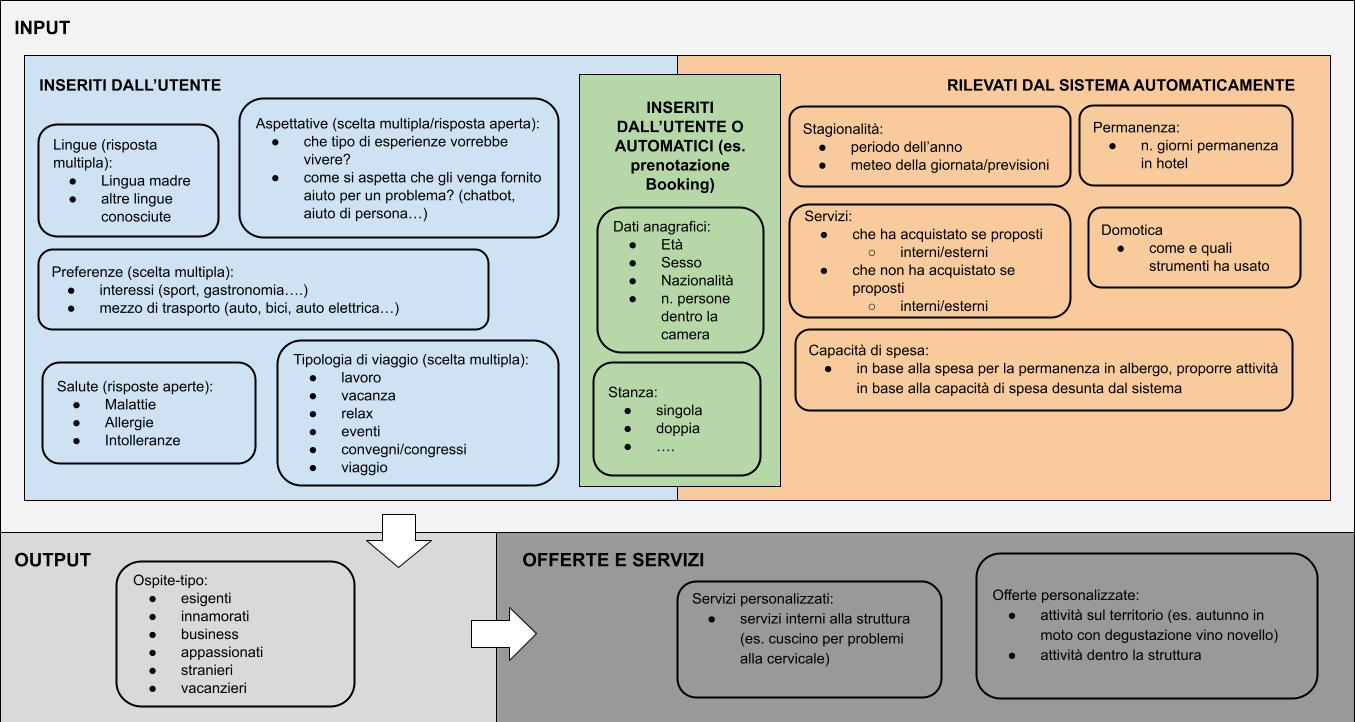



---



<p>&nbsp;</p> 

##### **Clustering Target**


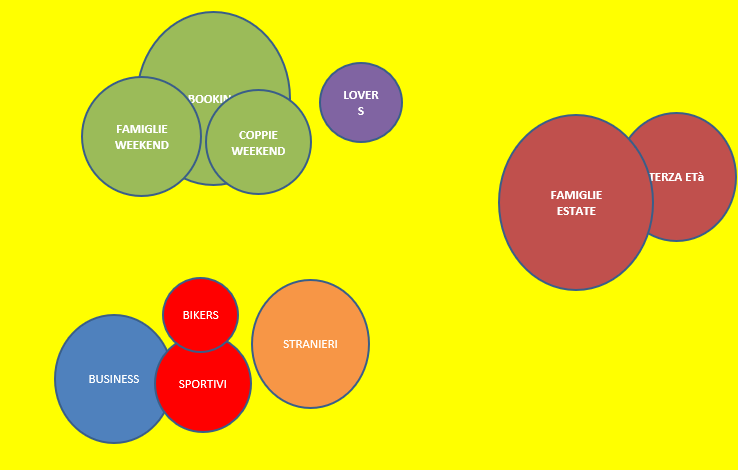




---



<p>&nbsp;</p> 

##### **Import modules and dataset**



In [45]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [32]:
#@title

from google.colab import drive
drive.mount('/content/drive/')

columns = [
    'hotel', # 0: resort hotel or city hotel
    'is_canceled', # 1: booking was cancelled (1) or not cancelled (0)
    'lead_time', # 2: days elapsed between the entering date of the booking into the PMS and the arrival date
    'arrival_date_year', # 3: year of arrival date
    'arrival_date_month', # 4: month of arrival date
    'arrival_date_week_number', # 5: week of arrival date
    'arrival_date_day_of_month', # 6: day of arrival date
    'stays_in_weekend_nights', # 7: number of weekend night (saturday or sunday)
    'stays_in_week_nights', # 8: number of week nights
    'adults', # 9: number of adults
    'children', # 10: number of children
    'babies', # 11: number of babies
    'meal', # 12: type of meal -> BB(Bed&Breakfast), HB(Half Board - mezza pensione), SC(Self Catering), Undefined, FB(Full Board)
    'country', # 13: country of origin
    'market_segment', # 14: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    'distribution_channel', # 15: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators
    'is_repeated_guest', # 16: repeated guest (1) or not (0)
    'previous_cancellations',# 17: Number of previous bookings that were cancelled by the customer prior to the current booking
    'previous_bookings_not_canceled', # 18: Number of previous bookings not cancelled by the customer prior to the current booking
    'reserved_room_type', # 19: Code of room type reserved. Code is presented instead of designation for anonymity reasons
    'assigned_room_type', # 20: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
    'booking_changes', # 21: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
    'deposit_type', # 22: No Deposit; Non Refund; Refundable
    'agent', # 23: ID of the travel agency that made the booking
    'company', # 24: ID of the company/entity that made the booking or responsible for paying the booking
    'days_in_waiting_list', # 25: Number of days the booking was in the waiting list before it was confirmed to the customer
    'customer_type', # 26: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
    'adr', # 27: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
    'required_car_parking_spaces', # 28: Number of car parking spaces required by the customer
    'total_of_special_requests', # 29: Number of special requests made by the customer (e.g. twin bed or high floor)
    'reservation_status', # 30: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
    'reservation_status_date', # 31: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
    'name', # 32
    'email', # 33
    'phone-number', # 34
    'credit_card' # 35 
]

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/VirtualMaitre/HotelDataset.csv')
print('\n\n\nDataset: {:} rows, {:} columns'.format(df.shape[0], df.shape[1]))
print('\nColumns:\n', list(df.columns.values), '\n\n')
df.head(5)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



Dataset: 119390 rows, 36 columns

Columns:
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card'] 




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498




---




<p>&nbsp;</p> 

##### **Drop Features**

In [33]:
#@title 

data = df.copy()
data.drop('hotel', axis=1, inplace=True)
data.drop('is_canceled', axis=1, inplace=True)
data.drop('lead_time', axis=1, inplace=True)
data.drop('arrival_date_year', axis=1, inplace=True)
data.drop('arrival_date_week_number', axis=1, inplace=True)
data.drop('arrival_date_day_of_month', axis=1, inplace=True)
data.drop('market_segment', axis=1, inplace=True)
data.drop('distribution_channel', axis=1, inplace=True)
data.drop('is_repeated_guest', axis=1, inplace=True)
data.drop('previous_cancellations', axis=1, inplace=True)
data.drop('previous_bookings_not_canceled', axis=1, inplace=True)
data.drop('reserved_room_type', axis=1, inplace=True)
data.drop('assigned_room_type', axis=1, inplace=True)
data.drop('booking_changes', axis=1, inplace=True)
data.drop('deposit_type', axis=1, inplace=True)
data.drop('agent', axis=1, inplace=True)
data.drop('company', axis=1, inplace=True)
data.drop('days_in_waiting_list', axis=1, inplace=True)
data.drop('customer_type', axis=1, inplace=True)
# data.drop('adr', axis=1, inplace=True)
data.drop('reservation_status', axis=1, inplace=True)
data.drop('reservation_status_date', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.drop('email', axis=1, inplace=True)
data.drop('phone-number', axis=1, inplace=True)
data.drop('credit_card', axis=1, inplace=True)

cols = list(data.columns.values)
print('Remaining Features:\n', data.columns.values)

Remaining Features:
 ['arrival_date_month' 'stays_in_weekend_nights' 'stays_in_week_nights'
 'adults' 'children' 'babies' 'meal' 'country' 'adr'
 'required_car_parking_spaces' 'total_of_special_requests']




---




<p>&nbsp;</p> 

##### **Useful functions**

In [34]:
#@title

# Label bar plot

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width), xy=(width, rect.get_y() + rect.get_height() - 0.07), 
                    xytext=(13, 0), textcoords="offset points", ha='center', va='bottom')





---



<p>&nbsp;</p> 

##### **1. EXPLORATION DATA ANALYSIS (EDA)** 

Useful Fetaures:


*   arrival_date_month
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   meal
*   country
*   adr
*   required_car_parking_spaces
*   total_of_special_requests


Steps:


1.   Drop Missing Values And No-Guest Occurrences
2.   Visual Analysis



<p>&nbsp;</p> 

> **Dataset Info**


In [35]:
data.head(5)

,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,adr,required_car_parking_spaces,total_of_special_requests
0,July,0,0,2,0.0,0,BB,PRT,0.0,0,0
1,July,0,0,2,0.0,0,BB,PRT,0.0,0,0
2,July,0,1,1,0.0,0,BB,GBR,75.0,0,0
3,July,0,1,1,0.0,0,BB,GBR,75.0,0,0
4,July,0,2,2,0.0,0,BB,GBR,98.0,0,1


In [36]:
# dtype, missing values presence
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   arrival_date_month           119390 non-null  object 
 1   stays_in_weekend_nights      119390 non-null  int64  
 2   stays_in_week_nights         119390 non-null  int64  
 3   adults                       119390 non-null  int64  
 4   children                     119386 non-null  float64
 5   babies                       119390 non-null  int64  
 6   meal                         119390 non-null  object 
 7   country                      118902 non-null  object 
 8   adr                          119390 non-null  float64
 9   required_car_parking_spaces  119390 non-null  int64  
 10  total_of_special_requests    119390 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 10.0+ MB


In [37]:
# how many missing values
data.isnull().sum(axis=0)

arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
dtype: int64

In [38]:
# values distribution
data.describe(include='all')

,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,adr,required_car_parking_spaces,total_of_special_requests
count,119390,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390.000000,119390.000000,119390.000000
unique,12,NaN,NaN,NaN,NaN,NaN,5,177,NaN,NaN,NaN
top,August,NaN,NaN,NaN,NaN,NaN,BB,PRT,NaN,NaN,NaN
freq,13877,NaN,NaN,NaN,NaN,NaN,92310,48590,NaN,NaN,NaN
mean,NaN,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,101.831122,0.062518,0.571363
std,NaN,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,50.535790,0.245291,0.792798
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-6.380000,0.000000,0.000000
25%,NaN,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,69.290000,0.000000,0.000000
50%,NaN,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,94.575000,0.000000,0.000000
75%,NaN,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,126.000000,0.000000,1.000000


<p>&nbsp;</p> 

###### **1.1 Data Cleaning** 

###### Drop Missing Values And No-Guest Occurrences

In [39]:
# @title

print('\n MISSING VALUES')
print('\nshape before dropping: ', data.shape)
datad=data.dropna(axis=0, subset=cols)
print('shape after dropping: ', datad.shape)
dropped=data.shape[0]-datad.shape[0]
print('dropped {:.2f} samples = {:.2f}% of dataset'.format(dropped, dropped*100/data.shape[0]))
data=datad.copy()


 MISSING VALUES

shape before dropping:  (119390, 11)
shape after dropping:  (118898, 11)
dropped 492.00 samples = 0.41% of dataset


In [41]:
# @title

print('\nNO GUEST')

print('\nshape before dropping: ', data.shape)
zero_guests = list(data.loc[data["adults"]
                            + data["children"]
                            + data["babies"]==0].index)
s = data.shape
data.drop(data.index[zero_guests], inplace=True)
print('shape after dropping: ', data.shape)
dropped=s[0]-data.shape[0]
print('dropped {:.2f} samples = {:.2f}% of dataset'.format(dropped, dropped*100/data.shape[0]))



NO GUEST

shape before dropping:  (118728, 11)
shape after dropping:  (118559, 11)
dropped 169.00 samples = 0.14% of dataset


<p>&nbsp;</p> 

###### **1.2 Visual Analysis** 


<p>&nbsp;</p> 

> **Heat Map**  


In [14]:
corr = data.corr()
corr.style.background_gradient()

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,required_car_parking_spaces,total_of_special_requests
stays_in_weekend_nights,1.000000,0.494888,0.090410,0.045430,0.018396,0.047300,-0.018147,0.071669
stays_in_week_nights,0.494888,1.000000,0.091999,0.044259,0.020157,0.063628,-0.024378,0.066785
adults,0.090410,0.091999,1.000000,0.029590,0.017887,0.227480,0.016370,0.121815
children,0.045430,0.044259,0.029590,1.000000,0.024131,0.325034,0.057060,0.081786
babies,0.018396,0.020157,0.017887,0.024131,1.000000,0.028591,0.036971,0.097601
adr,0.047300,0.063628,0.227480,0.325034,0.028591,1.000000,0.058053,0.171458
required_car_parking_spaces,-0.018147,-0.024378,0.016370,0.057060,0.036971,0.058053,1.000000,0.082675
total_of_special_requests,0.071669,0.066785,0.121815,0.081786,0.097601,0.171458,0.082675,1.000000


<p>&nbsp;</p> 

> **Country** 

In [47]:
# @title

# get number of acutal guests by country
country_data = pd.DataFrame(data["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [48]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

<p>&nbsp;</p> 

> **Heat Map**  



---






<p>&nbsp;</p> 

##### **2. PREPROCESSING**  

Steps: 

1.   Add Price-Per-Night
2.   Encode 
3.   Normalization






---





<p>&nbsp;</p> 

#### **3. TEST**  

In this phase we choose an ML model and train it for our task.

In [ ]:
X=data.copy()
X.drop('LAMP', axis=1, inplace=True)

y=data['LAMP']

print('X',X.shape,'   y', y.shape)

X (25000, 3)    y (25000,)


<p>&nbsp;</p> 

##### **3.1 Splitting Dataset**  

First of all, let's divide the dataset into 3 parts.  

The first part (Training Set) will be used to train the model.  

The second part (Validation Set) will instead be used to tune the model parameters.  

Finally, the third part (Test Set) will be used to evaluate the model's performance on previously unseen data.    

In [ ]:
# splitting dataset

X_train, X_primo, y_train, y_primo = train_test_split(X, y, random_state=0, test_size=0.40)
X_val, X_test, y_val, y_test = train_test_split(X_primo, y_primo, random_state=0, test_size=0.5)

print('X_train %s   X_val %s   X_test %s' % (str(X_train.shape), str(X_val.shape), str(X_test.shape)))
print('y_train %s     y_val %s     y_test %s' % (str(y_train.shape), str(y_val.shape), str(y_test.shape)))

X_train (15000, 3)   X_val (5000, 3)   X_test (5000, 3)
y_train (15000,)     y_val (5000,)     y_test (5000,)


<p>&nbsp;</p> 

##### **3.2 Scaling**  

Features scaling is performed to bring all data on the same scale.  

If this step were not performed, the model could give more importance to one feature rather than another.

In [ ]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_val_std = stdsc.transform(X_val)
X_test_std = stdsc.transform(X_test)

<p>&nbsp;</p> 

##### **3.3 Model Selection**

Let's train three different models now:  


1.   K-nearest neighbor
2.   Support Vector Machine
3.   Neural Netowrk

To have a comparison, let's also test a Dummy Classifier, that is is a classifier that makes predictions using simple rules.

This classifier is useful as a simple baseline to compare with other (real) classifiers.   
Do not use it for real problems.


In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors=50, n_jobs=-1)
knn.fit(X_train_std, y_train)
knn_tr_score = knn.score(X_train_std, y_train)
knn_val_score = knn.score(X_val_std, y_val)
print('Accuracy KNN Training Set: {:.5f}'.format(knn_tr_score))
print('Accuracy KNN Validation Set: {:.5f}'.format(knn_val_score))

Accuracy KNN Training Set: 1.00000
Accuracy KNN Validation Set: 1.00000


In [ ]:
# SVM

svm = SVC(C=0.01, kernel='rbf')
svm.fit(X_train_std, y_train)
svm_tr_score = svm.score(X_train_std, y_train)
svm_val_score = svm.score(X_val_std, y_val)
print('Accuracy SVM Training Set: {:.5f}'.format(svm_tr_score))
print('Accuracy SVM Validation Set: {:.5f}'.format(svm_val_score))

Accuracy SVM Training Set: 0.98920
Accuracy SVM Validation Set: 0.98940


In [ ]:
# Neural Network

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, alpha=0.0001, early_stopping=False)
mlp.fit(X_train_std,y_train)
mlp_tr_score = mlp.score(X_train_std, y_train)
mlp_val_score = mlp.score(X_val_std, y_val)
print('Accuracy NN Training Set: {:.5f}'.format(mlp_tr_score))
print('Accuracy NN Test Set: {:.5f}'.format(mlp_val_score))

Accuracy NN Training Set: 1.00000
Accuracy NN Test Set: 1.00000


In [ ]:
# Dummy Classifier

dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train_std, y_train)
dummy_tr_score = dummy.score(X_train_std, y_train)
dummy_val_score = dummy.score(X_val_std, y_val)
print('Accuracy Dummy Classifie Training Set: {:.5f}'.format(dummy_tr_score))
print('Accuracy Dummy Classifier Test Set: {:.5f}'.format(dummy_val_score))

Accuracy Dummy Classifie Training Set: 0.70500
Accuracy Dummy Classifier Test Set: 0.70060


<p>&nbsp;</p> 

> **Score Visualization**

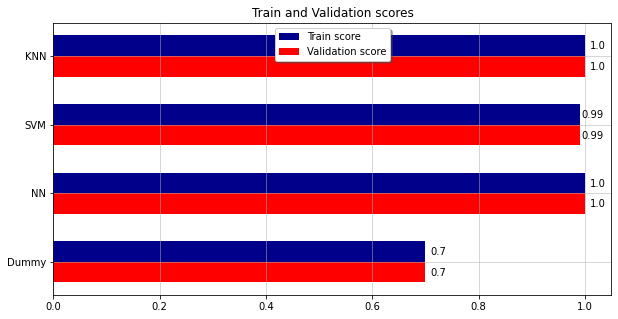

In [ ]:
# plot
labels = ['KNN', 'SVM', 'NN', 'Dummy']
train = [round(knn_tr_score,2), round(svm_tr_score,2), round(mlp_tr_score,2), round(dummy_tr_score,2)]
test = [round(knn_val_score,2), round(svm_val_score,2), round(mlp_val_score,2), round(dummy_val_score,2)]

y = np.arange(len(labels))
height = 0.3

fig, ax = plt.subplots(figsize=(10,5)) 
rects1 = ax.barh(y - height/2, train, height, label='Train score', color='darkblue')
rects2 = ax.barh(y + height/2, test, height, label='Validation score', color='red')

ax.set_title('Train and Validation scores')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(loc='upper center',shadow=True)
ax.invert_yaxis()

autolabel(rects1)
autolabel(rects2)
plt.grid(linewidth=0.5)

<p>&nbsp;</p> 

> **Conclusion**

Usually the best performing models should be chosen.  

However, since this is a trivial case, all classifiers, with the exception of the Dummy Classifier, obtain excellent results. No model shows signs of Overfitting or Underfitting (common problems which should be solved with appropriate techniques).  

We therefore decide to use the model with the worst performances (SVM) in the next phase, so as to see if through the tuning of the model parameters we can use better results.  

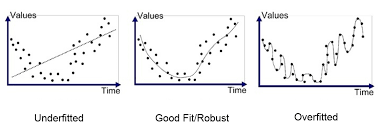

<p>&nbsp;</p> 

##### **3.4 Model Assessment**

This step should be performed on a further split of the dataset called Development Set.

<p>&nbsp;</p> 

> **Tuning Hyperparameter**  

The hyperparameters (C and Kernel) of the model are tuned through a Randomized Search.  

We can see that with the right parameters we can increase the accuracy of the model.  

In [ ]:
# svm

svm = SVC(random_state=0, probability=True)

CSVM = uniform(loc=0, scale=4)
kernelSVM = ['rbf', 'poly', 'sigmoid']

hyperparametersSVM = dict(C=CSVM, kernel=kernelSVM)

rsSVM = RandomizedSearchCV(svm, hyperparametersSVM, random_state=0, n_iter=10, cv=5, verbose=0, n_jobs=-1)

best_modelSVM = rsSVM.fit(X_train_std, y_train)

print('Best C:', best_modelSVM.best_estimator_.get_params()['C'])
print('Best Kernel:', best_modelSVM.best_estimator_.get_params()['kernel'], '\n')

clfSVM = rsSVM.best_estimator_
clfSVM.fit(X_train_std, y_train)
print('Training set accuracy: %.3f' % clfSVM.score(X_train_std, y_train))
print('Validation set accuracy: %.3f' % clfSVM.score(X_val_std, y_val))

Best C: 3.34431505414951
Best Kernel: rbf 

Training set accuracy: 1.000
Validation set accuracy: 1.000


<p>&nbsp;</p> 

> **Parameters Effect (SVM)**  

We note that as the parameter C increases, the performance of the model improves.  

Without going into detail, C is essentially a regularisation parameter.

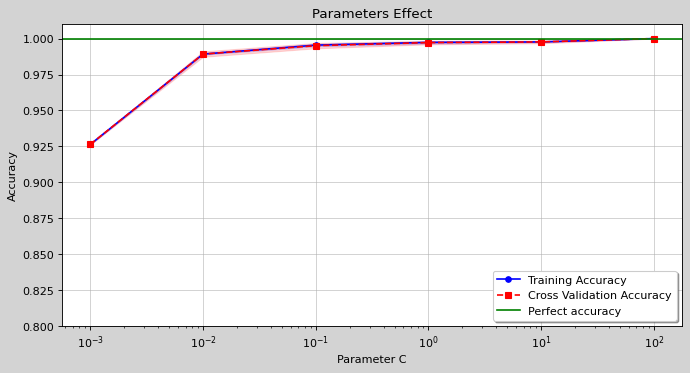

TrainCV Accuracy 1 st parameter [0.9263 0.9264 0.9264 0.9264 0.9264] mean: 0.9264 +/- 0.0
TestCV Accuracy  1 st parameter [0.9267 0.9263 0.9263 0.9263 0.9263] mean: 0.9264 +/- 0.0001 

TrainCV Accuracy 2 st parameter [0.9887 0.9896 0.9889 0.9899 0.9889] mean: 0.9892 +/- 0.0005
TestCV Accuracy  2 st parameter [0.9913 0.9877 0.9903 0.9863 0.9903] mean: 0.9892 +/- 0.0019 

TrainCV Accuracy 3 st parameter [0.9958 0.996  0.9956 0.9938 0.9961] mean: 0.9954 +/- 0.0009
TestCV Accuracy  3 st parameter [0.9963 0.9953 0.997  0.9917 0.995 ] mean: 0.9951 +/- 0.0018 

TrainCV Accuracy 4 st parameter [0.9975 0.9981 0.9974 0.9959 0.9978] mean: 0.9973 +/- 0.0007
TestCV Accuracy  4 st parameter [0.9983 0.996  0.9987 0.9957 0.9973] mean: 0.9972 +/- 0.0012 

TrainCV Accuracy 5 st parameter [0.9975 0.9981 0.9974 0.9976 0.9978] mean: 0.9977 +/- 0.0002
TestCV Accuracy  5 st parameter [0.9983 0.996  0.9987 0.998  0.9973] mean: 0.9977 +/- 0.0009 

TrainCV Accuracy 6 st parameter [1. 1. 1. 1. 1.] mean: 1.0 +/- 

In [ ]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_name='C'
plt, train_scores, test_scores = plot_parameters_curves(clfSVM, X_train_std, y_train, param_name, param_range, cv=5)

i=0
for p in param_range:
    print('TrainCV Accuracy', i+1, 'st parameter', np.around(train_scores[i],4), 
          'mean:', round(np.mean(train_scores[i]),4), '+/-', round(np.std(train_scores[i]),4))
    print('TestCV Accuracy ', i+1, 'st parameter', np.around(test_scores[i],4),
          'mean:', round(np.mean(test_scores[i]),4), '+/-', round(np.std(test_scores[i]),4), '\n')
    i+=1





---



<p>&nbsp;</p>

#### **4. EVALUATION**

Using the best values obtained from the Randomizer Search for the parameters, let's now test the model on the Test Set.

<p>&nbsp;</p>

##### **4.1 Test Set Accuracy**  

We see that even in the Test Set we get excellent results (due to the simplicity of the task).

In [ ]:
print('Accuracy Logistic Regression Training Set: {:.2f}'.format(clfSVM.score(X_train_std, y_train)))
print('Accuracy Logistic Regression Test     Set: {:.2f}'.format(clfSVM.score(X_test_std, y_test)))

Accuracy Logistic Regression Training Set: 1.00
Accuracy Logistic Regression Test     Set: 1.00


<p>&nbsp;</p>

##### **4.2 Classification Report**  

There are several classification metrics.  

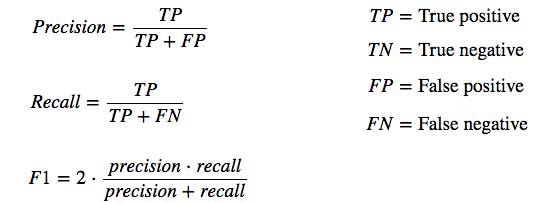

In [ ]:
y_pred = clfSVM.predict(X_test_std)
target_names = ['class 0', 'class 1', 'class 2']
print('\n\nTEST SET \nClassification Report:\n')
print(classification_report(y_test, y_pred, target_names=target_names))



TEST SET 
Classification Report:

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3492
     class 1       1.00      1.00      1.00       391
     class 2       1.00      1.00      1.00      1117

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



<P>&nbsp;</p>

##### **4.3 Confusion Matrix**  

As a final analysis let's visualize a Confusion Matrix (without normalization and with normalization).  

A Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. 

It is a table with different combinations of predicted and actual values.

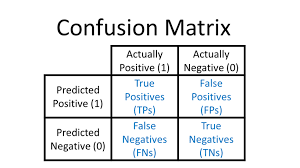


Confusion matrix, without normalization



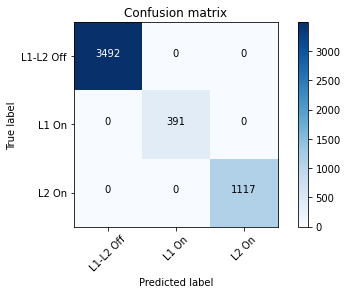

In [ ]:
y_pred = clfSVM.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['L1-L2 Off', 'L1 On', 'L2 On'])


Normalized confusion matrix



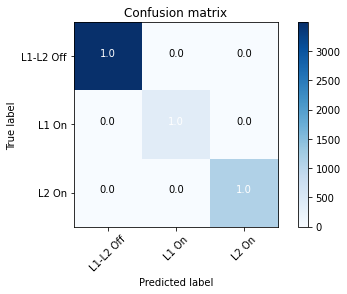

In [ ]:
plot_confusion_matrix(cm, classes=['L1-L2 Off', 'L1 On', 'L2 On'], normalize=True)